<h1><center>Lab 3</center></h1>

# WORK DURING THE LAB
 1. Implement the algorithm Tabu Search for the knapsack problem. Test the algorithm for two problem instances, considering different parameter settings.
 2. Read data for the Traveling Salesman Problem (TSP).
 3. Generate a greedy solution for TSP and verify its quality.

In [3]:
import numpy as np

def load_data(file_name: str) -> "list[tuple[int, int]], int, int":
    weights_and_values = []
    with open(file_name) as f:
        lines = f.readlines()
        num_items = int(lines[0].strip())
        for line in lines[1:num_items + 1]:
            parts = line.split()
            weight, value = int(parts[1]), int(parts[2])
            weights_and_values.append((weight, value))
        capacity = int(lines[num_items + 1].strip())
    return weights_and_values, capacity, num_items

def generate_solution(n: int):
    """
        Generate solution of length n using binary encoding
        Input:
          n: int
        Output:
          sol: list
              - binary encoding solution
    """
    return np.random.randint(2, size=n).tolist()

def fitness(solution: list[int], data: list[tuple[int, int]], capacity: int) -> tuple[int, int]:
    """
    Fitness function to evaluate the solution for the knapsack problem by calculating the total weight and value of the solution
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        total weight, total value of solution
    """
    total_value = 0
    total_weight = 0
    
    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += data[i][1]
            total_weight+= data[i][0]
    
    return total_weight, total_value

def is_valid(solution: list[int], data: list[tuple[int, int]], capacity: int) -> bool:
    """
    Check if the solution is valid by checking if the total weight of the solution is less than the capacity
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        bool: True if the solution is valid, False otherwise
    """
    weight = fitness(solution, data, capacity)[0]
    
    return weight <= capacity

def generate_valid_sol(data: list[tuple[int, int]], capacity: int) -> list[int]:
    """
    Generate a valid solution by generating random solutions until a valid solution is found
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        list: a valid solution
    """
    while True:
        solution = generate_solution(len(data))
        if is_valid(solution, data, capacity):
            return solution

### 1.Implement the algorithm Tabu Search for the knapsack problem. Test the algorithm for two problem instances, considering different parameter settings.
#### Tabu Search Pseudocode:
    c = initSolution()
    best = c
    M = initMemory()
    while (stop-crietria not met):
        x = getBestNeighbourNonTabu(c)
        updateMemory()
        c=x
        update best
    return best


In [37]:
def get_neighbours(solution: list[int]) -> list[list[int]]:
    """
    Generate neighbours of the solution by flipping a single bit
    Input:
        solution: list of 0s and 1s representing the inclusion of items
    Output:
        list: list of neighbours
    """
    neighbours = []
    
    for i in range(len(solution)):
        neighbour = solution.copy()
        neighbour[i] = 1 - neighbour[i]
        neighbours.append(neighbour)
    
    return neighbours

def tabu_search_knapsack(data: list[tuple[int, int]], capacity: int, max_iter: int, tabu_size: int) -> list[int]:
    """
    Tabu Search algorithm for the knapsack problem
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        max_iter: int, maximum number of iterations
        tabu_size: int, size of the tabu list
    Output:
        list: best solution found
    """
    # Initialize solution
    c = generate_valid_sol(data, capacity)
    best = c
    # Initialize memory
    memory = []
    
    # Stop condition is the number of iterations
    for _ in range(max_iter):
        # Get neighbours of the current solution
        neighbours = get_neighbours(c)
        best_neighbour = None
        best_value = -1
        
        # Select best neighbour
        for neighbour in neighbours:
            if neighbour not in memory:
                if fitness(neighbour, data, capacity)[1] > best_value and is_valid(neighbour, data, capacity):
                    best_neighbour = neighbour
                    best_value = fitness(neighbour, data, capacity)[1]
        
        # Update memory
        if best_value > fitness(best, data, capacity)[1]:
            best = best_neighbour
        
        # Add the best neighbour to memory
        memory.append(best_neighbour)
        if len(memory) > tabu_size:
            memory.pop(0) 
        
        # Update current solution
        c = best_neighbour   
        
        # Update best solution
        if best_value > fitness(best, data, capacity)[1]:
            best = best_neighbour
    
    return best


### Test Tabu Search on KnapSack Problem with different parameter settings

In [38]:
# Load data for 20 items
data, capacity, _ = load_data("data/knapsack/knapsack-20.txt")

# Test Tabu Search with different parameter settings
iterations = [10, 50, 100, 1000]
tabu_sizes = [3, 5, 10]

print("20 items dataset:")
best_value = None 
best_iteration_tabu_size = 0, 0
for iteration in iterations:
    for tabu_size in tabu_sizes:
        best_solution = tabu_search_knapsack(data, capacity, iteration, tabu_size)
        if best_value is None or fitness(best_solution, data, capacity)[1] > best_value:
            best_value = fitness(best_solution, data, capacity)[1]
            best_iteration_tabu_size = iteration, tabu_size
        print(f"Iterations: {iteration}, Tabu Size: {tabu_size}, Best Solution: {fitness(best_solution, data, capacity)}")
        
print(f"\nBest Solution: {best_value}, Iterations: {best_iteration_tabu_size[0]}, Tabu Size: {best_iteration_tabu_size[1]}")
        
# Load data for 200 items
data, capacity, _ = load_data("data/knapsack/rucsac-200.txt")

# Test Tabu Search with different parameter settings
iterations = [10, 50, 100, 1000]
tabu_sizes = [3, 5, 10]

print("\n200 items dataset:")
best_value = None 
best_iteration_tabu_size = 0, 0
for iteration in iterations:
    for tabu_size in tabu_sizes:
        best_solution = tabu_search_knapsack(data, capacity, iteration, tabu_size)
        if best_value is None or fitness(best_solution, data, capacity)[1] > best_value:
            best_value = fitness(best_solution, data, capacity)[1]
            best_iteration_tabu_size = iteration, tabu_size
        print(f"Iterations: {iteration}, Tabu Size: {tabu_size}, Best Solution: {fitness(best_solution, data, capacity)}")

print(f"\nBest Solution: {best_value}, Iterations: {best_iteration_tabu_size[0]}, Tabu Size: {best_iteration_tabu_size[1]}")

20 items dataset:
Iterations: 10, Tabu Size: 3, Best Solution: (517, 657)
Iterations: 10, Tabu Size: 5, Best Solution: (524, 673)
Iterations: 10, Tabu Size: 10, Best Solution: (509, 691)
Iterations: 50, Tabu Size: 3, Best Solution: (521, 707)
Iterations: 50, Tabu Size: 5, Best Solution: (522, 785)
Iterations: 50, Tabu Size: 10, Best Solution: (521, 782)
Iterations: 100, Tabu Size: 3, Best Solution: (521, 779)
Iterations: 100, Tabu Size: 5, Best Solution: (522, 779)
Iterations: 100, Tabu Size: 10, Best Solution: (521, 779)
Iterations: 1000, Tabu Size: 3, Best Solution: (514, 752)
Iterations: 1000, Tabu Size: 5, Best Solution: (522, 785)
Iterations: 1000, Tabu Size: 10, Best Solution: (522, 779)

Best Solution: 785, Iterations: 50, Tabu Size: 5

200 items dataset:
Iterations: 10, Tabu Size: 3, Best Solution: (112630, 95730)
Iterations: 10, Tabu Size: 5, Best Solution: (112633, 96133)
Iterations: 10, Tabu Size: 10, Best Solution: (112646, 95746)
Iterations: 50, Tabu Size: 3, Best Solution

# Travelling Salesman Problem (TSP)

Given a collection of N cities and the cost of travel between each pair of them, the traveling salesman problem, or TSP for short, is to find the cheapest way of visiting all the cities and returning to your starting point.  In the standard version we study, the travel costs are symmetric in the sense that traveling from city X to city Y costs just as much as traveling from Y to X.

## 2. Read data for the Traveling Salesman Problem (TSP).

In [1]:
def load_tsp_data(file_name: str) -> list[tuple[float, float]]:
    """
    Load TSP data from file
    Input:
        file_name: str, name of the file containing TSP data
    Output:
        list of tuples: each tuple contains (x, y) coordinates of a city
    """
    with open(file_name) as f:
        lines = f.readlines()
        data = []
        start_reading = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                data.append((float(parts[1]), float(parts[2])))
    return data


In [2]:
# Load TSP data from kroE100.tsp
tsp_data = load_tsp_data("data/tsp/kroE100.tsp")
print(tsp_data)

[(3477.0, 949.0), (91.0, 1732.0), (3972.0, 329.0), (198.0, 1632.0), (1806.0, 733.0), (538.0, 1023.0), (3430.0, 1088.0), (2186.0, 766.0), (1513.0, 1646.0), (2143.0, 1611.0), (53.0, 1657.0), (3404.0, 1307.0), (1034.0, 1344.0), (2823.0, 376.0), (3104.0, 1931.0), (3232.0, 324.0), (2790.0, 1457.0), (374.0, 9.0), (741.0, 146.0), (3083.0, 1938.0), (3502.0, 1067.0), (1280.0, 237.0), (3326.0, 1846.0), (217.0, 38.0), (2503.0, 1172.0), (3527.0, 41.0), (739.0, 1850.0), (3548.0, 1999.0), (48.0, 154.0), (1419.0, 872.0), (1689.0, 1223.0), (3468.0, 1404.0), (1628.0, 253.0), (382.0, 872.0), (3029.0, 1242.0), (3646.0, 1758.0), (285.0, 1029.0), (1782.0, 93.0), (1067.0, 371.0), (2849.0, 1214.0), (920.0, 1835.0), (1741.0, 712.0), (876.0, 220.0), (2753.0, 283.0), (2609.0, 1286.0), (3941.0, 258.0), (3613.0, 523.0), (1754.0, 559.0), (2916.0, 1724.0), (2445.0, 1820.0), (3825.0, 1101.0), (2779.0, 435.0), (201.0, 693.0), (2502.0, 1274.0), (765.0, 833.0), (3105.0, 1823.0), (1937.0, 1400.0), (3364.0, 1498.0), (370

In [41]:
# Load TSP data from uy734.tsp
tsp_data = load_tsp_data("data/tsp/uy734.tsp")
print(tsp_data)

[(30133.3333, 57633.3333), (30166.6667, 57100.0), (30233.3333, 57583.3333), (30250.0, 56850.0), (30250.0, 56950.0), (30250.0, 57583.3333), (30300.0, 56966.6667), (30316.6667, 56816.6667), (30400.0, 56466.6667), (30400.0, 56783.3333), (30433.3333, 57433.3333), (30466.6667, 56550.0), (30483.3333, 56516.6667), (30500.0, 56450.0), (30500.0, 56666.6667), (30550.0, 57866.6667), (30566.6667, 56883.3333), (30600.0, 57683.3333), (30616.6667, 56900.0), (30633.3333, 56166.6667), (30683.3333, 57033.3333), (30683.3333, 57516.6667), (30716.6667, 56600.0), (30733.3333, 56733.3333), (30733.3333, 57316.6667), (30750.0, 56750.0), (30783.3333, 57783.3333), (30833.3333, 56750.0), (30866.6667, 56366.6667), (30900.0, 55516.6667), (30916.6667, 56300.0), (30933.3333, 55483.3333), (30933.3333, 55550.0), (30950.0, 56650.0), (30966.6667, 55550.0), (30966.6667, 57533.3333), (31000.0, 55683.3333), (31000.0, 56250.0), (31016.6667, 56566.6667), (31033.3333, 56600.0), (31033.3333, 56883.3333), (31083.3333, 56016.6667

## 3. Generate a greedy solution for TSP and verify its quality.

In [4]:
def euclidean_distance(city1: tuple[float, float], city2: tuple[float, float]) -> float:
    """
    Calculate the Euclidean distance between two cities
    Input:
        city1: tuple, (x, y) coordinates of city 1
        city2: tuple, (x, y) coordinates of city 2
    Output:
        float: Euclidean distance between the two cities
    """
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def greedy_tsp(cities: list[tuple[float, float]]) -> tuple[list[int], float]:
    """
    Generate a greedy solution for the TSP
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        tuple: a tuple containing the greedy solution and its total distance
    """
    n = len(cities)
    visited = [False] * n
    tour = []
    total_distance = 0

    # Start from first city
    current_city = 0
    visited[current_city] = True
    tour.append(current_city)

    for _ in range(n - 1):
        min_distance = float('inf')
        nearest_city = None
        for i in range(n):
            if not visited[i]:
                distance = euclidean_distance(cities[current_city], cities[i])
                if distance < min_distance:
                    min_distance = distance
                    nearest_city = i
        total_distance += min_distance
        current_city = nearest_city
        visited[current_city] = True
        tour.append(current_city)

    # Return to the starting city
    total_distance += euclidean_distance(cities[current_city], cities[0])

    return tour, round(total_distance, 2)

# Test for kroE100.tsp
tsp_data = load_tsp_data("data/tsp/kroE100.tsp")
tour, total_distance = greedy_tsp(tsp_data)
print(f"Total Distance: {total_distance}")
print(tour)

Total Distance: 27587.19
[0, 73, 20, 6, 75, 11, 31, 57, 62, 87, 34, 39, 98, 44, 53, 24, 96, 79, 56, 9, 59, 49, 48, 55, 14, 19, 22, 63, 94, 35, 58, 97, 50, 68, 46, 82, 72, 15, 60, 70, 88, 80, 78, 25, 45, 2, 13, 51, 43, 71, 67, 37, 32, 47, 89, 41, 4, 7, 64, 30, 65, 29, 92, 90, 54, 5, 33, 36, 84, 95, 76, 69, 3, 1, 10, 81, 91, 26, 66, 40, 74, 86, 8, 12, 38, 42, 85, 18, 93, 17, 23, 28, 99, 77, 52, 21, 16, 83, 61, 27]


## ASSIGNMENT A3
1. Implement the algorithm Tabu Search for solving TSP.
2. Perform experiments for 2 TSP instances selected from the list below: one instance from
the list A1-A16 and one instance from the list B1-B29.
3. Compare results, considering different parameter settings for the algorithm.


## Idea
Neighbours: Swap two cities in the tour using 2-opt (2-interchange move)
 - defined by deleting two nonadjacent edges from the current tour and adding two other edges to obtain a new feasible tour

Starting solution: Greedy solution
 - I've chosen a greedy solution as the starting to get better overall results
 - To maintain diversity, I've added a perturbation step to introduce variety

Tabu List: Store the last few moves to avoid revisiting the same solution

Aspiration criterion: Allow tabu move if it's the best so far

## Pseudocode:
    procedure TabuSearch()
    begin
        tries <- 0
        repeat
            generate a tour
            count <- 0
            repeat
                identify a set T of 2-opt moves select the best move m from T
                make appropiate m
                update the tabu list and other variables
                if the new tour is the best-so-far for a given tries
                then update local best tour information
                count <- count + 1
            until count = ITER
            tries <- tries + 1
            if the current tour is the best-so-far (for all tries)
            then update global best tour information
        until tries = MAX_TRIES
    end

In [7]:
import numpy as np

def random_tour(cities: list[tuple[float, float]]) -> list[int]:
    """
    Generate random tours by shuffling the cities
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        list: list of random tours
    """
    n = len(cities)
    tour = np.random.permutation(n).tolist()
    return tour
    

def perturb_tour(tour: list[int]) -> list[int]:
    """
    Perturb the tour by swapping two cities to introduce variety.
    Input:
        tour: list of city indices representing the current tour
    Output:
        new_tour: list of city indices representing the perturbed tour
    """
    new_tour = tour[:]
    i, j = np.random.choice(len(tour), 2)  # Randomly pick two indices
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]  # Swap the cities
    return new_tour

def fitness_tsp(tour: list[int], cities: list[tuple[float, float]]) -> float:
    """
    Calculate the total distance of the tour.
    Input:
        tour: list of city indices representing the tour
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        float: total distance of the tour
    """
    total_distance = 0.0
    n = len(tour)
    for i in range(n):
        total_distance += euclidean_distance(cities[tour[i]], cities[tour[(i + 1) % n]])  # Wrap around
        
    # Return distance rounded for better readability
    return round(total_distance, 2)


def get_neighbours_2opt(tour: list[int]) -> list[tuple[int, int]]:
    """
    Generate neighbors using the 2-opt move.
    Input: 
        tour: list of city indices representing the current tour
    Output:
        list: list of tuples representing the swap indices 
    """
    neighbours = []
    n = len(tour)

    for i in range(n - 1):
        for j in range(i + 2, n):  # Ensure non-adjacent swaps
            neighbours.append((i, j))  # Just return the swap indices

    return neighbours

def tabu_search_tsp(cities: list[tuple[float, float]], max_tries: int, max_iter: int, tabu_size: int) -> tuple[list[int], float]:
    """
    Perform Tabu Search for the Traveling Salesman Problem using 2-opt moves and Greedy perturbed starts.
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
        max_tries: int, number of independent runs
        max_iter: int, maximum iterations per run
        tabu_size: int, size of the tabu list
    Output:
        tuple: best tour found and its total distance
    """
    best_global_tour = None
    best_global_distance = float('inf')

    # Greedy initialization 
    greedy_tour, _ = greedy_tsp(cities)

    for _ in range(max_tries):
        current_tour = perturb_tour(greedy_tour)

        best_local_tour = current_tour
        best_local_distance = fitness_tsp(current_tour, cities)
        tabu_list = set()  # Store tabu moves as swapped edges

        for _ in range(max_iter):
            best_neighbour = None
            best_neighbour_distance = float('inf')
            best_move = None

            # Step 1: Generate 2-opt neighbors (only the moves)
            moves = get_neighbours_2opt(current_tour)

            # Step 2: Select the best move from T
            for move in moves:
                i, j = move

                # Apply the 2-opt move: reverse the segment between i and j
                new_tour = current_tour[:i] + current_tour[i:j][::-1] + current_tour[j:]
                new_distance = fitness_tsp(new_tour, cities)

                # Aspiration criterion: allow tabu move if it's the best so far, skip otherwise
                if move in tabu_list and new_distance >= best_local_distance:
                    continue

                if new_distance < best_neighbour_distance:
                    best_neighbour = new_tour
                    best_neighbour_distance = new_distance
                    best_move = move

            # Step 3: Move to the best non-tabu neighbor
            if best_neighbour:
                current_tour = best_neighbour
                current_distance = best_neighbour_distance

                # Step 4: Update global best if improved
                if current_distance < best_local_distance:
                    best_local_tour = current_tour[:]
                    best_local_distance = current_distance

                # Step 5: Update Tabu List (store the move)
                tabu_list.add(best_move)
                if len(tabu_list) > tabu_size:
                    tabu_list.pop()  # Maintain fixed tabu size

        if best_local_distance < best_global_distance:
            best_global_tour = best_local_tour
            best_global_distance = best_local_distance

    return best_global_tour, best_global_distance

def tabu_search_random_tsp(cities: list[tuple[float, float]], max_tries: int, max_iter: int, tabu_size: int) -> tuple[list[int], float]:
    """
    Perform Tabu Search for the Traveling Salesman Problem using 2-opt moves and random starts.
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
        max_tries: int, number of independent runs
        max_iter: int, maximum iterations per run
        tabu_size: int, size of the tabu list
    Output:
        tuple: best tour found and its total distance
    """
    best_global_tour = None
    best_global_distance = float('inf')


    for _ in range(max_tries):
        
        current_tour = random_tour(cities)
        best_local_tour = current_tour
        best_local_distance = fitness_tsp(current_tour, cities)
        tabu_list = set()  # Store tabu moves as swapped edges

        for _ in range(max_iter):
            best_neighbour = None
            best_neighbour_distance = float('inf')
            best_move = None

            # Step 1: Generate 2-opt neighbors (only the moves)
            moves = get_neighbours_2opt(current_tour)

            # Step 2: Select the best move from T
            for move in moves:
                i, j = move

                # Apply the 2-opt move: reverse the segment between i and j
                new_tour = current_tour[:i] + current_tour[i:j][::-1] + current_tour[j:]
                new_distance = fitness_tsp(new_tour, cities)

                # Aspiration criterion: allow tabu move if it's the best so far
                if move in tabu_list and new_distance >= best_local_distance:
                    continue

                if new_distance < best_neighbour_distance:
                    best_neighbour = new_tour
                    best_neighbour_distance = new_distance
                    best_move = move

            # Step 3: Move to the best non-tabu neighbor
            if best_neighbour:
                current_tour = best_neighbour
                current_distance = best_neighbour_distance

                # Step 4: Update global best if improved
                if current_distance < best_local_distance:
                    best_local_tour = current_tour[:]
                    best_local_distance = current_distance

                # Step 5: Update Tabu List (store the move)
                tabu_list.add(best_move)
                if len(tabu_list) > tabu_size:
                    tabu_list.pop()  # Maintain fixed tabu size

        if best_local_distance < best_global_distance:
            best_global_tour = best_local_tour
            best_global_distance = best_local_distance

    return best_global_tour, best_global_distance



## Code of functions which facilitate testing and reporting results

In [3]:
import matplotlib.pyplot as plt
import time

    
def plot_results_side_by_side(iterations: list[int], tries: list[int], results: dict[int, dict[int, list[float]]], tabu_sizes: list[int]) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    for idx, s in enumerate(tabu_sizes):
        ax = axes[idx]
        for t in tries:
            ax.plot(iterations, results[s][t], marker='o', label=f'Tries: {t}')
        ax.set_title(f"Results for different tries and iterations (Tabu Size: {s})")
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Total Distance")
        ax.legend()
        ax.grid(True)
       
    plt.tight_layout()
    plt.show()
    

def plot_comparison(iterations: list[int], results_greedy: list[float], results_random: list[float], tabu_size: int) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(iterations, results_greedy, marker='o', label='Greedy Start')
    ax.plot(iterations, results_random, marker='x', label='Random Start')

    ax.set_title(f"Comparison of Greedy and Random Start Tabu Search (Tabu Size: {tabu_size})")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Total Distance")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

def plot_tour(tour: list[int], cities: list[tuple[float, float]]) -> None:
    """
    Plot the tour for the TSP
    Input:
        tour: list of city indices representing the tour
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        None
    """
    n = len(tour)
    x = [cities[tour[i]][0] for i in range(n)]
    y = [cities[tour[i]][1] for i in range(n)]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.plot(x + [x[0]], y + [y[0]], linestyle='-', color='r')
    plt.title("Tour for the TSP")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

def plot_cities(cities: list[tuple[float, float]]) -> None:
    """
    Plot the cities for the TSP
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        None
    """
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.plot(x, y, marker='o', linestyle='', color='b')
    plt.title("Cities for the TSP")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


## Testing for `kroE100.tsp`

### Graphical representation of a tour generated by Tabu Search for TSP using Greedy Start on the `kroE100.tsp` dataset

Total Distance: 24086.11


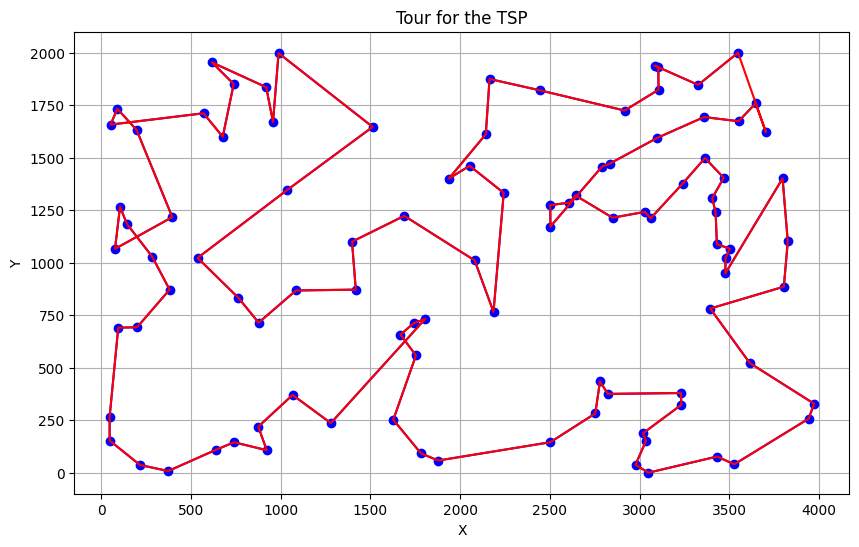

In [8]:
# Load TSP Data
tsp_data = load_tsp_data("data/tsp/kroE100.tsp")
tour, distance = tabu_search_tsp(tsp_data, 2, 10, 5)
print(f'Total Distance: {distance}')
plot_tour(tour, tsp_data)


| Tries | Iterations | Tabu Size | Total Distance | Computation Time (s) |
|-------|------------|-----------|----------------|----------------------|
| 1 | 5 | 5 | 25627.55 | 3.43 |
| 1 | 10 | 5 | 24139.45 | 6.25 |
| 1 | 25 | 5 | 23257.11 | 17.69 |
| 1 | 50 | 5 | 23214.74 | 34.07 |
| 3 | 5 | 5 | 25198.61 | 10.26 |
| 3 | 10 | 5 | 24086.11 | 20.52 |
| 3 | 25 | 5 | 23257.11 | 51.45 |
| 3 | 50 | 5 | 23212.65 | 101.71 |
| 5 | 5 | 5 | 25181.57 | 16.89 |
| 5 | 10 | 5 | 24086.11 | 33.92 |
| 5 | 25 | 5 | 23257.11 | 84.88 |
| 5 | 50 | 5 | 23093.67 | 169.62 |
| 1 | 5 | 50 | 25627.55 | 3.38 |
| 1 | 10 | 50 | 24048.4 | 6.74 |
| 1 | 25 | 50 | 23257.11 | 16.91 |
| 1 | 50 | 50 | 23212.65 | 33.01 |
| 3 | 5 | 50 | 24862.83 | 9.79 |
| 3 | 10 | 50 | 23847.63 | 19.79 |
| 3 | 25 | 50 | 23212.65 | 49.23 |
| 3 | 50 | 50 | 23212.65 | 98.80 |
| 5 | 5 | 50 | 25513.95 | 16.36 |
| 5 | 10 | 50 | 24082.0 | 32.76 |
| 5 | 25 | 50 | 23257.11 | 82.12 |
| 5 | 50 | 50 | 23212.65 | 153.17 |


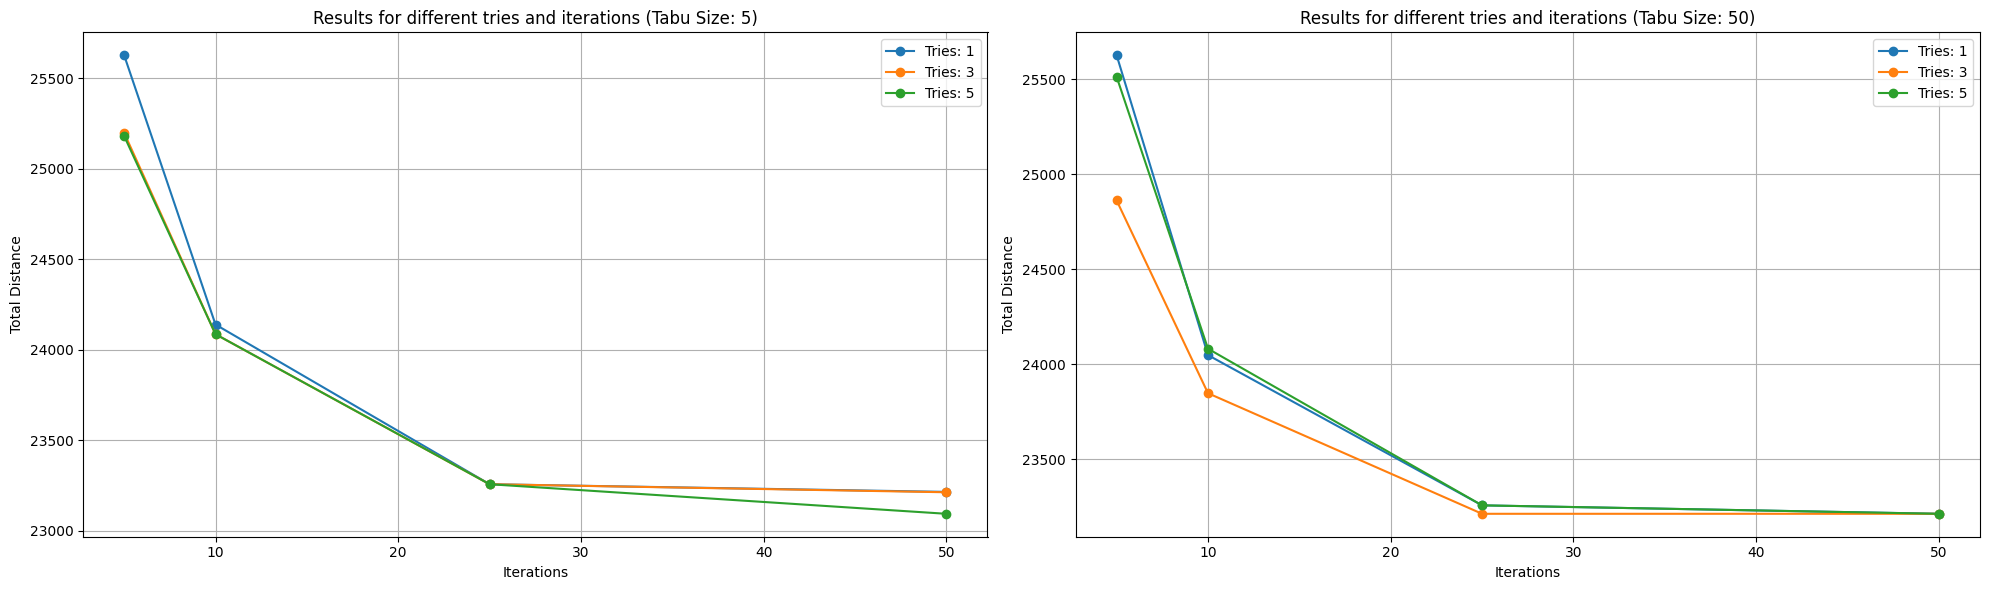

In [53]:

# Example usage
iterations = [5, 10, 25, 50]
tries = [1, 3, 5]
tabu_sizes = [5, 50]

# Initialize a dictionary to store the results for each tabu size
all_results = {s: {t: [] for t in tries} for s in tabu_sizes}

print("| Tries | Iterations | Tabu Size | Total Distance | Computation Time (s) |")
print("|-------|------------|-----------|----------------|----------------------|")

# Run Tabu Search for each combination of iterations, tries, and tabu sizes
for s in tabu_sizes:
    for t in tries:
        for it in iterations:
            start_time = time.time()
            _, total_distance = tabu_search_tsp(tsp_data, t, it, s)
            computation_time = time.time() - start_time
            print(f"| {t} | {it} | {s} | {total_distance} | {computation_time:.2f} |")
            all_results[s][t].append(total_distance)
            
# Plot the results for each tabu size
plot_results_side_by_side(iterations, tries, all_results, tabu_sizes)

| Tries | Iterations | Tabu Size | Total Distance | Computation Time (s) | ----- | Tabu Size | Total Distance | Computation Time (s) |
|-------|------------|-----------|----------------|----------------------|-------|-----------|----------------|----------------------|
| 1     | 5          | 5         | 25627.55       | 3.43                 |       | 50        | 25627.55       | 3.38                 |
| 1     | 10         | 5         | 24139.45       | 6.25                 |       | 50        | 24048.4        | 6.74                 |
| 1     | 25         | 5         | 23257.11       | 17.69                |       | 50        | 23257.11       | 16.91                |
| 1     | 50         | 5         | 23214.74       | 34.07                |       | 50        | 23212.65       | 33.01                |
| 3     | 5          | 5         | 25198.61       | 10.26                |       | 50        | 24862.83       | 9.79                 |
| 3     | 10         | 5         | 24086.11       | 20.52                |       | 50        | 23847.63       | 19.79                |
| 3     | 25         | 5         | 23257.11       | 51.45                |       | 50        | 23212.65       | 49.23                |
| 3     | 50         | 5         | 23212.65       | 101.71               |       | 50        | 23212.65       | 98.80                |
| 5     | 5          | 5         | 25181.57       | 16.89                |       | 50        | 25513.95       | 16.36                |
| 5     | 10         | 5         | 24086.11       | 33.92                |       | 50        | 24082.0        | 32.76                |
| 5     | 25         | 5         | 23257.11       | 84.88                |       | 50        | 23257.11       | 82.12                |
| 5     | 50         | 5         | 23093.67       | 169.62               |       | 50        | 23212.65       | 153.17               |

# Results and conclusions for 100 cities dataset
## Plot:
   - The results show that the total distance decreases as the number of iterations increases.
   - Total distance also decreases as the number of tries increases, but the improvement is not as significant as the number of iterations for this dataset
   - The tabu size does not have a significant impact on the total distance for this dataset
   - The results converge to a similar total distance after around 20 tries
## Tabel:
   - The computation time increases as the number of iterations and tries increase
   - It is a trade-off between the better solutions and computation time
   - Tabu size does not affect the computation time
   - The algorithm I've implemented has a high computation time, especially for a large number of iterations and tries (complexity n^3)
    
### Observations:
   - A tabu size of 50 for a dataset of 100 cities is too large and limits exploration and might exlcude good moves early (leading to stagnation)
   - Best solution gotten was 23093.67 for 50 iterations, 5 tries, and tabu size of 5
   - The algorithm is very slow due to having to choose the best neighbour each step

## Testing for `uy734.tsp`

### Graphical representation of all cities of Uruguay from the `uy734.tsp` dataset

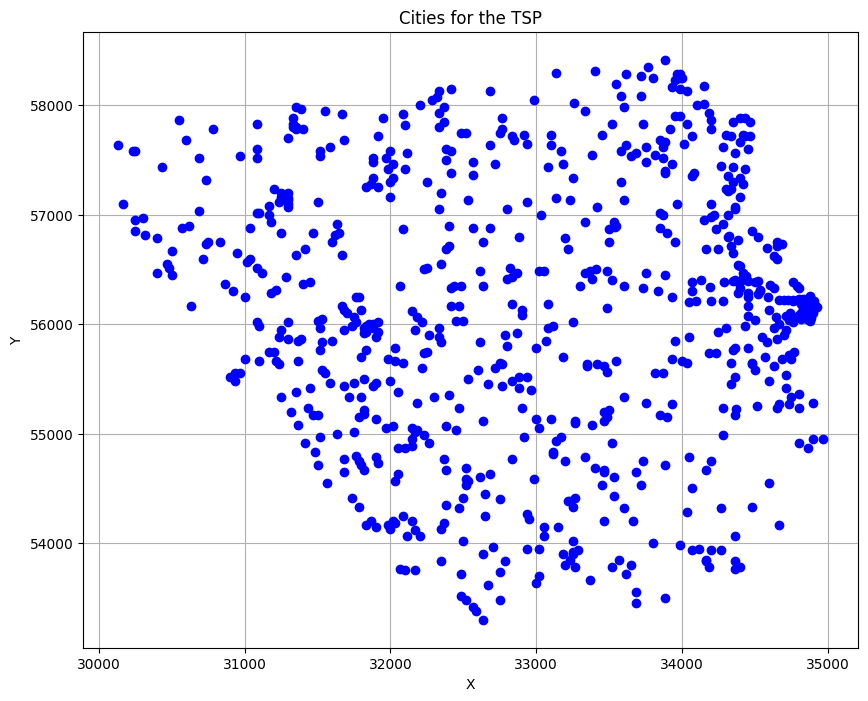

In [5]:
# Load TSP data
tsp_data = load_tsp_data("data/tsp/uy734.tsp")

# Plot the cities
plot_cities(tsp_data)

## Actual photo of Uruguay's map
![Uruguay](https://vemaps.com/uploads/img/uy-03.png)

| Tries | Iterations | Tabu Size | Total Distance | Computation Time (s) |
|-------|------------|-----------|----------------|----------------------|
| 1 | 1 | 27 | 106951.29 | 254.02 |
| 1 | 2 | 27 | 102594.36 | 513.11 |
| 1 | 3 | 27 | 100733.74 | 746.83 |
| 2 | 1 | 27 | 108342.23 | 526.03 |
| 2 | 2 | 27 | 100091.14 | 994.12 |
| 2 | 3 | 27 | 100519.35 | 1440.24 |
| 1 | 1 | 54 | 104355.38 | 239.06 |
| 1 | 2 | 54 | 102594.36 | 478.94 |
| 1 | 3 | 54 | 100733.74 | 723.07 |
| 2 | 1 | 54 | 104382.76 | 473.37 |
| 2 | 2 | 54 | 102594.36 | 955.50 |
| 2 | 3 | 54 | 100733.74 | 1430.97 |


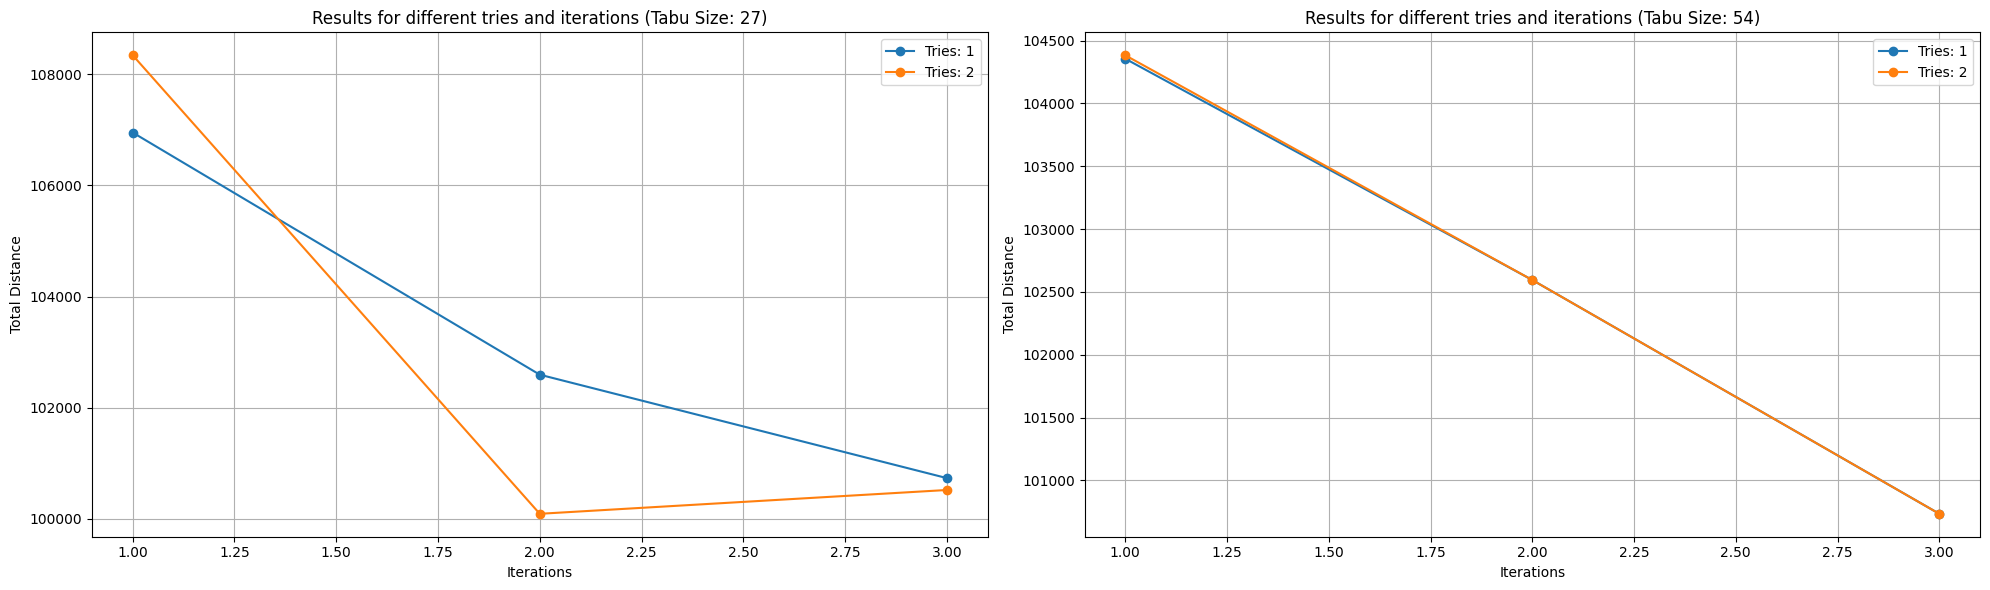

In [54]:
# Example usage
iterations = [1, 2, 3]
tries = [1, 2]
# Chosen tabu sizes as sqrt(734) and 2*sqrt(734)
tabu_sizes = [27, 54]

# Initialize a dictionary to store the results for each tabu size
all_results = {s: {t: [] for t in tries} for s in tabu_sizes}

print("| Tries | Iterations | Tabu Size | Total Distance | Computation Time (s) |")
print("|-------|------------|-----------|----------------|----------------------|")

# Run Tabu Search for each combination of iterations, tries, and tabu sizes
for s in tabu_sizes:
    for t in tries:
        for it in iterations:
            start_time = time.time()
            _, total_distance = tabu_search_tsp(tsp_data, t, it, s)
            computation_time = time.time() - start_time
            print(f"| {t} | {it} | {s} | {total_distance} | {computation_time:.2f} |")
            all_results[s][t].append(total_distance)
            
# Plot the results for each tabu size
plot_results_side_by_side(iterations, tries, all_results, tabu_sizes)

| Tries | Iterations | Tabu Size | Total Distance | Computation Time (s) | | Tabu Size | Total Distance | Computation Time (s) |
|-------|------------|-----------|----------------|----------------------|-|-----------|----------------|----------------------|
| 1     | 1          | 27        | 106951.29      | 254.02               | | 54        | 104355.38      | 239.06               |
| 1     | 2          | 27        | 102594.36      | 513.11               | | 54        | 102594.36      | 478.94               |
| 1     | 3          | 27        | 100733.74      | 746.83               | | 54        | 100733.74      | 723.07               |
| 2     | 1          | 27        | 108342.23      | 526.03               | | 54        | 104382.76      | 473.37               |
| 2     | 2          | 27        | 100091.14      | 994.12               | | 54        | 102594.36      | 955.50               |
| 2     | 3          | 27        | 100519.35      | 1440.24              | | 54        | 100733.74      | 1430.97              |

# Results and conclusions for 734 cities dataset
## Conclusions:
   - The solutions improved with more iterations/tries for the minimal tests I got to run
   - For a tsp with this amount of city, this type of tabu search implementation is very demanding, due to having to select best possible neighbour
   - Thanks to starting with a greedy inital solution, the total distance got are pretty low
   

## Comparison between random starts Tabu Search and Greedy start

| Iterations | Greedy Start Total Distance | Greedy Start Computation Time (s) | Random Start Total Distance | Random Start Computation Time (s) |
|------------|-----------------------------|-----------------------------------|-----------------------------|-----------------------------------|
| 1          | 29462.52                    | 1.35                              | 156301.33                   | 1.31                              |
| 10         | 24086.11                    | 13.08                             | 105051.81                   | 13.28                             |
| 25         | 23257.11                    | 33.66                             | 71283.47                    | 33.07                             |
| 50         | 23212.65                    | 66.37                             | 36119.82                    | 64.89                             |
| 100        | 23086.27                    | 128.71                            | 23309.12                    | 126.38 

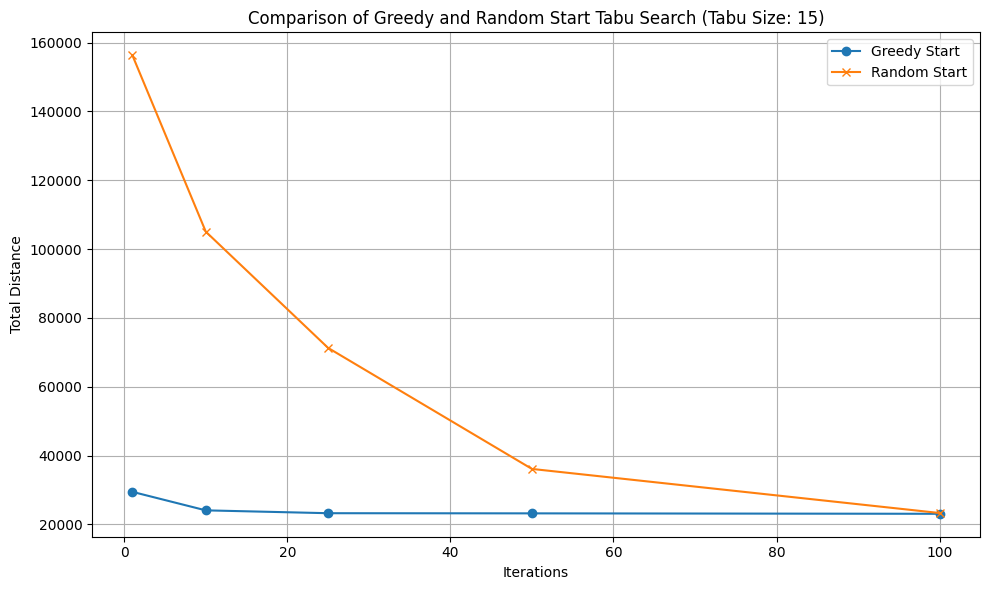

In [65]:
import time

# Load TSP data
tsp_data = load_tsp_data("data/tsp/kroE100.tsp")

# Example usage
iterations = [1, 10, 25, 50, 100]
tries = 2
tabu_size = 15

# Initialize lists to store results
results_greedy = []
results_random = []

print("| Iterations | Greedy Start Total Distance | Greedy Start Computation Time (s) | Random Start Total Distance | Random Start Computation Time (s) |")
print("|------------|-----------------------------|-----------------------------------|-----------------------------|-----------------------------------|")

# Run Tabu Search for each iteration count
for it in iterations:
    # Greedy Start
    start_time = time.time()
    _, total_distance_greedy = tabu_search_tsp(tsp_data, tries, it, tabu_size)
    computation_time_greedy = time.time() - start_time
    results_greedy.append(total_distance_greedy)
    
    # Random Start
    start_time = time.time()
    _, total_distance_random = tabu_search_random_tsp(tsp_data, tries, it, tabu_size)
    computation_time_random = time.time() - start_time
    results_random.append(total_distance_random)
    
    # Print results
    print(f"| {it:<10} | {total_distance_greedy:<27} | {computation_time_greedy:<33.2f} | {total_distance_random:<27} | {computation_time_random:<33.2f} |")

# Plot the comparison
plot_comparison(iterations, results_greedy, results_random, tabu_size)

| Iterations | Greedy Start Total Distance | Greedy Start Computation Time (s) | Random Start Total Distance | Random Start Computation Time (s) |
|------------|-----------------------------|-----------------------------------|-----------------------------|-----------------------------------|
| 1          | 29462.52                    | 1.35                              | 156301.33                   | 1.31                              |
| 10         | 24086.11                    | 13.08                             | 105051.81                   | 13.28                             |
| 25         | 23257.11                    | 33.66                             | 71283.47                    | 33.07                             |
| 50         | 23212.65                    | 66.37                             | 36119.82                    | 64.89                             |
| 100        | 23086.27                    | 128.71                            | 23309.12                    | 126.38                            |

## Comparison between Random Start and Greedy Start for Tabu Search
   - The Random Start has an bad inital solution because of it being a completly random permutation
      
   - The jumps in quality of solutions between iterations of Greedy start are way smaller because of a good initial solution
      
   - It takes over 100 iterations to get comparable solutions for the two types of starts
      
   - Computation time for both variants is virtually the same so choosing a Greedy start is benefical
      
   - Having a better initial start grants the posibility of reaching a solution near the global optima faster